In [8]:
## import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

In [9]:
exp_name = "ball_verification"
N = 240
d = 400
s = 5
m = 20
rho = 0.2
# rho_list = [0,0.4]
iter_type = "projected"
solver_list = ["distributed"]
gamma = 0.08789
total = 30

-------
0.2 0.004658175410869263
0.2 0.004846951740560528
0.2 0.009672183437044601
0.2 0.014186351384514356
0.2 0.0035681398418466238
0.2 0.007897648800328559
0.2 0.006001382075778161
0.2 0.007537809568982488
0.2 0.009268406760305877
0.2 0.007314345047734802
0.2 0.008829510749532766
0.2 0.0060993221085802974
0.2 0.005446671884017951
0.2 0.0061778430436593805
0.2 0.0035138767589837083
0.2 0.010223925173568817
0.2 0.013598254335988344
0.2 0.007954313524167523
0.2 0.004306971481157476
0.2 0.008257814958113745
0.2 0.009053122221646615
0.2 0.009879972075619796
0.2 0.005316295005216155
0.2 0.01213956455281432
0.2 0.006695423111719995
0.2 0.00613190953300344
0.2 0.00902580984334311
0.2 0.009765269550894524
0.2 0.005900638526199422
0.2 0.013689186312183957


/home/ruqi/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ruqi/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


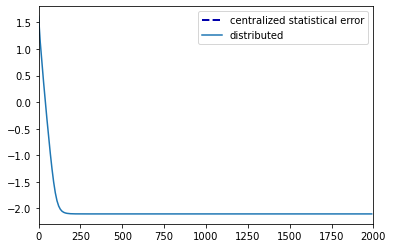

In [10]:
length = 2000
mask = np.arange(0, length, 10)
x = np.arange(0, length)


# centralized_loss = []
# for num_exp in range(total):
#     filename = "../output/{}/N{}_d{}_s{}_exp{}/centralized_m{}_rho{}_gamma{}.output".format(exp_name, N, d, s, num_exp, m, rho, gamma)
#     _, loss = pickle.load(open(filename, "rb"))
#     centralized_loss.append(loss[-1])
    
centralized_logloss = np.log10(np.mean(centralized_loss))
plt.axhline(y=centralized_logloss, c="#0000ab",  linestyle='--', linewidth=2, label="centralized statistical error")
print("-------")
for solver in solver_list:
    loss_matrix = []
    
    for num_exp in range(total):
        filename = "../output/{}/N{}_d{}_s{}_exp{}/{}_m{}_rho{}_gamma{}.output".format(exp_name, N, d, s, num_exp, solver, m, rho, gamma)
        theta, loss = pickle.load(open(filename, "rb"))        
        if len(loss) < length:
            print("WARNING: the total iteration number is less than the required length, manually adjusted")
            loss = np.array(loss + (length-len(loss_matrix))*[loss_matrix[-1]])
        else:
            loss = np.array(loss)
        print(rho, loss[-1])

        loss_matrix.append(loss)

    plt.plot(x[mask], np.log10(np.mean(loss_matrix, axis=0))[mask], label=solver)
    plt.xlim(0,length)
    plt.legend()
# plt.show()
tikzplotlib.save('floor.tex')